# Making stacked histograms
- processes an `events[year][ch][sample]` object using `make_events_dict()`
- uses `plot_hists()` to make stacked histograms

In [1]:
import glob
import os
import json
import pickle
import yaml
import math

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
# get lumi
with open("../fileset/luminosity.json") as f:
    luminosity = json.load(f)
    
luminosity

{'ele': {'Run2': 137640.0,
  '2016APV': 19492.72,
  '2016': 16809.96,
  '2017': 41476.02,
  '2018': 59816.23},
 'mu': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'lep': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'had': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96}}

In [4]:
def get_lumi(years, channels):
    lum_ = 0
    for year in years:
        lum = 0
        for ch in channels:
            lum += luminosity[ch][year] / 1000.0

        lum_ += lum / len(channels)    
    return lum_

In [5]:
 # define your regions here
presel = {
        "mu": {
            "mll": "mll_loose>60",
            "mll": "mll_loose<120",
            "miso": " (loose_lep1_pt<55) | ( (loose_lep1_pt>=55) & (loose_lep1_miso<0.8) ) "
        },
        "ele": {
            "mll": "mll_loose>60",
            "mll": "mll_loose<120",          
        },
}

samples = [
    "Data",
    "DYJets",
]

years = ["2016", "2016APV", "2017", "2018"]
# years = ["2017"]

samples_dir = {
    "ele": {
        "2018": "../eos/June21_zll_2018",
        "2017": "../eos/June21_zll_2017",
        "2016": "../eos/June21_zll_2016",
        "2016APV": "../eos/June21_zll_2016APV",
    },
    
    "mu": {
        "2018": "../eos/Oct9_zll_mu_2018",
        "2017": "../eos/Oct9_zll_mu_2017",
        "2016": "../eos/Oct9_zll_mu_2016",
        "2016APV": "../eos/Oct9_zll_mu_2016APV",
    },
}

In [6]:
from make_stacked_hists import make_events_dict

channels = [
    "ele",
    "mu",
]

out = {}
for ch in channels:
    out[ch] = make_events_dict(years, [ch], samples_dir[ch], samples, presel)

# wrap
events_dict = {}
for year in years:
    events_dict[year] = {}
    for ch in channels:
        events_dict[year][ch] = out[ch][year][ch]

INFO:root:Finding SingleElectron_Run2016G samples and should combine them under Data
INFO:root:Applying mll selection on 368 events
INFO:root:Will fill the Data dataframe with the remaining 351 events
INFO:root:tot event weight 351.0 

INFO:root:Finding SingleElectron_Run2016H samples and should combine them under Data
INFO:root:Applying mll selection on 395 events
INFO:root:Will fill the Data dataframe with the remaining 384 events
INFO:root:tot event weight 384.0 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-650ToInf samples and should combine them under DYJets
INFO:root:Applying mll selection on 11291 events
INFO:root:Will fill the DYJets dataframe with the remaining 9816 events
INFO:root:tot event weight 3.1928982181721164 

INFO:root:Finding SingleElectron_Run2016F samples and should combine them under Data
INFO:root:Applying mll selection on 23 events
INFO:root:Will fill the Data dataframe with the remaining 23 events
INFO:root:tot event weight 23.0 

INFO:root:Finding DYJetsToLL_L

INFO:root:Will fill the DYJets dataframe with the remaining 12015 events
INFO:root:tot event weight 832.4409671038563 

INFO:root:Finding EGamma_Run2018A samples and should combine them under Data
INFO:root:Applying mll selection on 605 events
INFO:root:Will fill the Data dataframe with the remaining 583 events
INFO:root:tot event weight 583.0 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-50To100 samples and should combine them under DYJets
INFO:root:Applying mll selection on 218 events
INFO:root:Will fill the DYJets dataframe with the remaining 178 events
INFO:root:tot event weight 39.494572844925244 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-250To400 samples and should combine them under DYJets
INFO:root:Applying mll selection on 225027 events
INFO:root:Will fill the DYJets dataframe with the remaining 223268 events
INFO:root:tot event weight 1858.2271574968488 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-400To650 samples and should combine them under DYJets
INFO:root:Applying mll sele

INFO:root:tot event weight 29.371834571290144 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-100To250 samples and should combine them under DYJets
INFO:root:Applying mll selection on 19875 events
INFO:root:Applying miso selection on 19454 events
INFO:root:Will fill the DYJets dataframe with the remaining 19402 events
INFO:root:tot event weight 1198.936510141237 

INFO:root:Finding SingleMuon_Run2017C samples and should combine them under Data
INFO:root:Applying mll selection on 1417 events
INFO:root:Applying miso selection on 1376 events
INFO:root:Will fill the Data dataframe with the remaining 1372 events
INFO:root:tot event weight 1372.0 

INFO:root:Finding SingleMuon_Run2017D samples and should combine them under Data
INFO:root:Applying mll selection on 574 events
INFO:root:Applying miso selection on 554 events
INFO:root:Will fill the Data dataframe with the remaining 554 events
INFO:root:tot event weight 554.0 

INFO:root:Finding DYJetsToLL_LHEFilterPtZ-50To100 samples and should comb

# Stacked hists

In [7]:
def fix_neg_yields(h):
    """
    Will set the bin yields of a process to 0 if the nominal yield is negative, and will
    set the yield to 0 for the full Systematic axis.
    """
    for sample in h.axes["samples"]:
        neg_bins = np.where(h[{"samples": sample}].values() < 0)[0]

        if len(neg_bins) > 0:
            print(f"{sample}, has {len(neg_bins)} bins with negative yield.. will set them to 0")

            sample_index = np.argmax(np.array(h.axes["samples"]) == sample)

            for neg_bin in neg_bins:
                h.view(flow=True)[sample_index, neg_bin + 1] = (0, 0)

In [8]:
for key in events_dict["2017"]["mu"]["Data"].keys():
    print(key)

N_tight_lep
N_loose_lep
tight_lep1_pt
tight_lep1_eta
tight_lep2_pt
tight_lep2_eta
mll_tight
loose_lep1_pt
loose_lep1_eta
loose_lep2_pt
loose_lep2_eta
mll_loose
met_pt
NumFatjets
lep_fj_dr
fj_pt
fj_eta
fj_phi
mT_tight1
mT_loose1
fj_mass
loose_lep1_miso
loose_lep2_miso
tight_lep1_miso
tight_lep2_miso
xsecweight
nominal


In [10]:
vars_to_plot = [
#     "N_tight_lep",
#     "N_loose_lep",
    "tight_lep1_pt",
    "tight_lep1_eta",
#     "tight_lep2_pt",
#     "tight_lep2_eta",
#     "mll_tight",
    "mll_loose",    
    "loose_lep1_pt",
    "loose_lep1_eta",
#     "loose_lep2_pt",
#     "loose_lep2_eta",
#     "met_pt",
#     "mT_tight1",
]

samples_to_plot = [
    "Data",
    "DYJets",
]

In [23]:
import utils

axis_dict = {}

axis_dict["ele"] = {
    "loose_lep1_pt": hist2.axis.Regular(40, 38, 400, name="var", label=r"Loose electron $p_T$ [GeV]", overflow=True),    
    "loose_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Loose electron |$\eta$|", overflow=True),    

    "tight_lep1_pt": hist2.axis.Regular(30, 38, 200, name="var", label=r"Tight electron $p_T$ [GeV]", overflow=True), 
    "tight_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Tight electron |$\eta$|", overflow=True),

    "met_pt": hist2.axis.Regular(40, 0, 20, name="var", label=r"MET [GeV]", overflow=True),

    "mll_tight": hist2.axis.Regular(50, 60, 120, name="var", label=r"m$\ell$$\ell$", overflow=True),
    "mll_loose": hist2.axis.Regular(50, 60, 120, name="var", label=r"m$\ell$$\ell$", overflow=True),
    
    "loose_lep1_eta_endcaps": hist2.axis.Regular(25, 1.57, 2.4, name="var", label=r"Loose electron |$\eta$|", overflow=True),
    "tight_lep1_eta_endcaps": hist2.axis.Regular(25, 1.57, 2.4, name="var", label=r"Tight electron |$\eta$|", overflow=True),

    "loose_lep1_eta_barrel": hist2.axis.Regular(25, 0, 1.57, name="var", label=r"Loose electron |$\eta$|", overflow=True),
    "tight_lep1_eta_barrel": hist2.axis.Regular(25, 0, 1.57, name="var", label=r"Tight electron |$\eta$|", overflow=True),
}

axis_dict["mu"] = {
    "loose_lep1_pt": hist2.axis.Regular(40, 38, 400, name="var", label=r"Loose muon $p_T$ [GeV]", overflow=True),    
    "loose_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Loose muon |$\eta$|", overflow=True),    

    "tight_lep1_pt": hist2.axis.Regular(30, 38, 200, name="var", label=r"Tight muon $p_T$ [GeV]", overflow=True), 
    "tight_lep1_eta": hist2.axis.Regular(25, 0, 2.4, name="var", label=r"Tight muon |$\eta$|", overflow=True),

    "met_pt": hist2.axis.Regular(40, 0, 20, name="var", label=r"MET [GeV]", overflow=True),

    "mll_tight": hist2.axis.Regular(50, 60, 120, name="var", label=r"m$\ell$$\ell$", overflow=True),
    "mll_loose": hist2.axis.Regular(50, 60, 120, name="var", label=r"m$\ell$$\ell$", overflow=True),
    
    "loose_lep1_eta_endcaps": hist2.axis.Regular(25, 1.479, 2.4, name="var", label=r"Loose muon |$\eta$|", overflow=True),
    "tight_lep1_eta_endcaps": hist2.axis.Regular(25, 1.479, 2.4, name="var", label=r"Tight muon |$\eta$|", overflow=True),

    "loose_lep1_eta_barrel": hist2.axis.Regular(25, 0, 1.479, name="var", label=r"Loose muon |$\eta$|", overflow=True),
    "tight_lep1_eta_barrel": hist2.axis.Regular(25, 0, 1.479, name="var", label=r"Tight muon |$\eta$|", overflow=True),        
}

years = [
    "2016", 
    "2016APV", 
    "2017", 
    "2018",
]

channels = [
#     "ele",
    "mu",
]

cut = "endcaps"
# cut = "barrel"
# cut = ""

# fill histograms
hists = {}

for ch in channels:
    for var in vars_to_plot:
        
        if ("barrel" in cut) and ("eta" in var):
            ax = axis_dict[ch][var + "_barrel"]
        elif ("endcaps" in cut) and ("eta" in var):
            ax = axis_dict[ch][var + "_endcaps"]
        else:
            ax = axis_dict[ch][var]
            
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            ax,
            storage=hist2.storage.Weight(),            
        )

        for year in years:    
            for sample in samples_to_plot:
                
                df = events_dict[year][ch][sample]

                # apply eta cut
                if "barrel" in cut:
                    df = df[abs(df["tight_lep1_eta"]) < 1.48]
                elif "endcaps" in cut:
                    df = df[abs(df["tight_lep1_eta"]) > 1.48]    

                # get the absolute of eta in case that is the variable to be plotted
                if "eta" in var:
                    x = np.absolute(df[var])
                else:
                    x = df[var]                
                    
                x = df[var]
                w = df["nominal"]

                msk = (w<100) & (w>-100)
                x = x[msk]
                w = w[msk]

                hists[var].fill(
                    samples=sample,
                    var=x,
                    weight=w,
                )     

    for var in vars_to_plot:
        fix_neg_yields(hists[var])

DYJets, has 1 bins with negative yield.. will set them to 0


Will plot tight_lep1_pt histogram
Will plot tight_lep1_eta histogram
Will plot mll_loose histogram
Will plot loose_lep1_pt histogram
Will plot loose_lep1_eta histogram


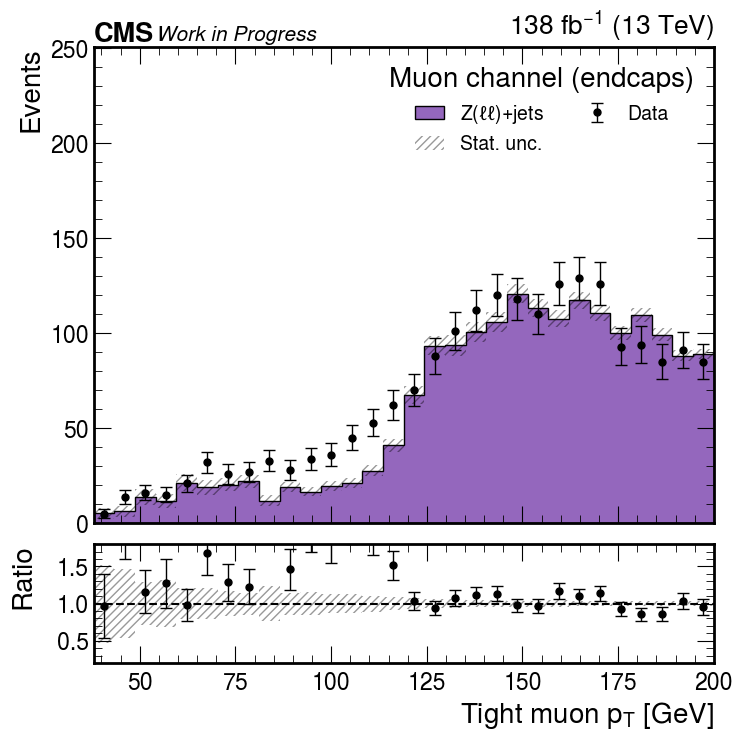

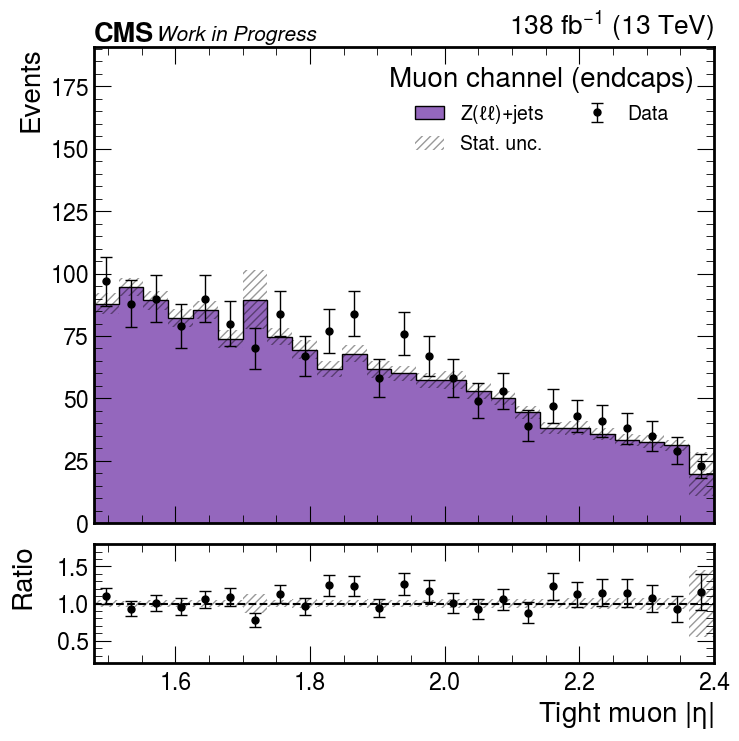

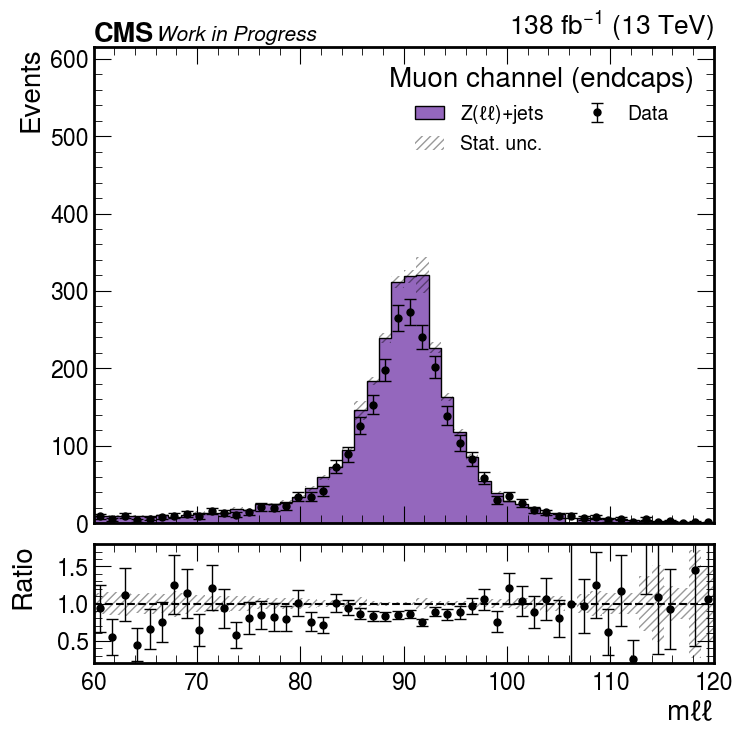

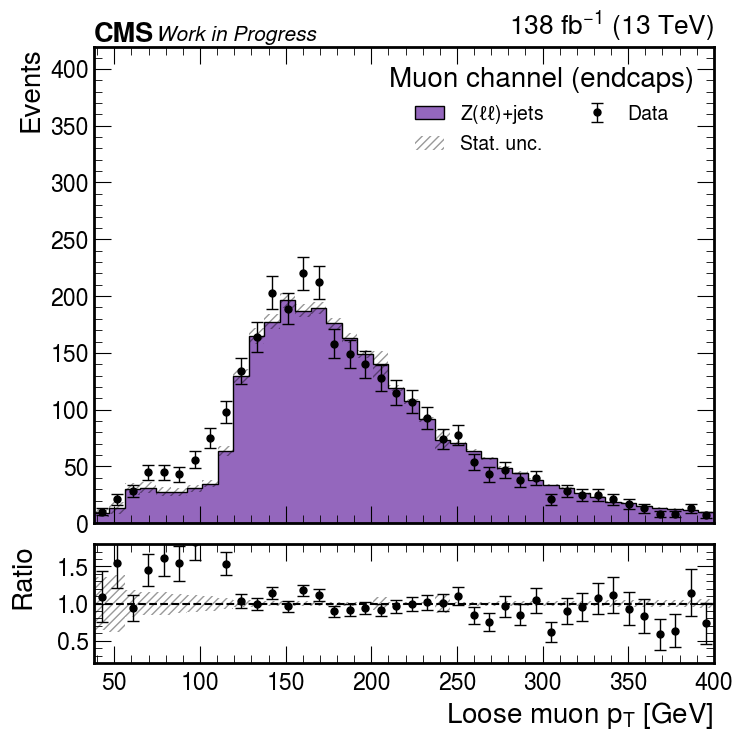

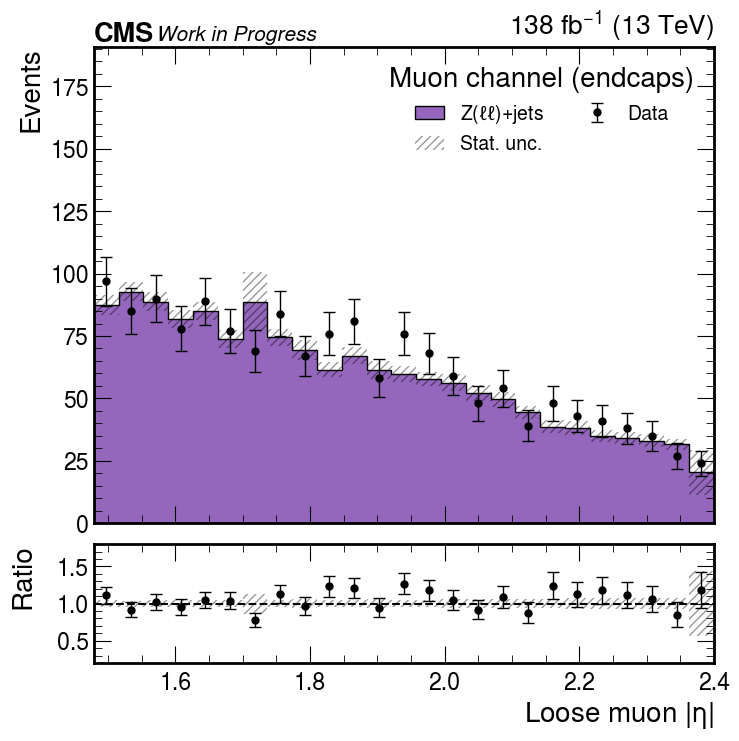

In [24]:
nice_ch = {
    "ele": "Electron channel",
    "mu": "Muon channel",
}

plt.rcParams.update({"font.size": 20})
add_data = True
add_soverb = False
    
from utils import plot_hists as plot_hists

if len(years)>1:
    PATH = f"/Users/fmokhtar/Desktop/AN_2024/prompt/{ch}_Run2"
else:
    PATH = f"/Users/fmokhtar/Desktop/AN_2024/prompt/{ch}_{year}"

if "barrel" in cut:
    add_text = " (barrel)"
elif "endcaps" in cut:
    add_text = " (endcaps)"
else:
    add_text = ""

if not os.path.exists(PATH):
    # Create the directory
    os.makedirs(PATH)    

plot_hists(hists, years, channels, vars_to_plot,             
            add_data=True,
            logy=False,
            mult=1,
            outpath=PATH,
            text_=nice_ch[ch] + add_text,
            blind_region=False,
           save_as=cut,
#            save_as=f"{ch}",
            plot_Fake_unc=0.5,
#             plot_syst_unc=(SYST_UNC_up, SYST_UNC_down) if plot_syst_unc else None,
#            add_soverb=True,
           legend_ncol=2,
          )

# Deriving the SF

In [25]:
years = [
    "2016", 
    "2016APV", 
    "2017", 
    "2018",
]
channels = [
    "ele",
    "mu",
]

pt_threshold = {
    "ele": 120,
    "mu": 55,
}

regions = [
    "Barrel_allpt",
#     "Barrel_highpt",
#     "Barrel_lowpt",
    
    "Endcap_allpt",
#     "Endcap_highpt",
#     "Endcap_lowpt",
]

EWK_SF = {}
    
for ch in channels:
    EWK_SF[ch] = {}

    for region in regions:
        EWK_SF[ch][region] = {}

        h = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            hist2.axis.Regular(20, 60, 120, name="var", label=r"mll", overflow=True),
            storage=hist2.storage.Weight(),            
        )        

        for year in years:
            for sample in samples_to_plot:
                df = events_dict[year][ch][sample]

                x = df["mll_tight"]
                w = df["nominal"]

                # Apply weight cuts
                mask = (w < 100) & (w > -100)

                if "Barrel" in region:
                    msk_eta = abs(df["tight_lep1_eta"]) < 1.479
                else:
                    msk_eta = abs(df["tight_lep1_eta"]) > 1.479

                if "lowpt" in region:
                    msk_pt = df["tight_lep1_pt"] < pt_threshold[ch]
                elif "highpt" in region:
                    msk_pt = df["tight_lep1_pt"] >= pt_threshold[ch]
                else:
                    msk_pt = df["tight_lep1_pt"] >= 30

                x = x[mask & msk_eta & msk_pt]
                w = w[mask & msk_eta & msk_pt]

                h.fill(
                    samples=sample,
                    var=x,
                    weight=w,
                )

        # Calculate the scale factor for the current year
        data = h[{"samples": "Data"}].sum().value
        ewk = h[{"samples": "DYJets"}].sum().value

        sf = data / ewk
        sf_unc = sf * np.sqrt( (np.sqrt(data)/data)**2 + (np.sqrt(ewk)/ewk)**2 )

        ##############################
        EWK_SF[ch][region]["Nominal"] = sf
        EWK_SF[ch][region]["EWK_SF_Up"] = sf + sf_unc
        EWK_SF[ch][region]["EWK_SF_Down"] = sf - sf_unc

In [30]:
def print_dict_as_code(d, indent=0):
    """
    Function to print the dictionary `d` as Python code that can be copy-pasted.
    :param d: The dictionary to print
    :param indent: The current indentation level
    """
    # Set the initial indentation
    ind = ' ' * (indent * 4)
    
    # Start the dictionary
    print(f"{ind}{{")
    
    # Get the total number of items to remove the last comma
    total_items = len(d)
    for i, (key, value) in enumerate(d.items()):
        is_last = i == total_items - 1  # Check if this is the last item
        
        if isinstance(value, dict):
            print(f'{ind}    "{key}": ', end="")
            print_dict_as_code(value, indent + 1)
        else:
            # If the value is not a dictionary, print the key-value pair
            print(f'{ind}    "{key}": {value:.3f}', end="")
            if not is_last:
                print(",")  # Print comma only if not the last item
            else:
                print()  # No comma if it's the last item
    
    # Close the dictionary with proper indentation
    print(f"{ind}}}", end="")
    if indent > 0:  # Add a comma if it's part of a nested dictionary
        print(",")
    else:
        print()  # No comma if it's the top-level dictionary

In [31]:
# Print the dictionary in the Python code format
print("EWK_SF = ", end="")
print_dict_as_code(EWK_SF)

EWK_SF = {
    "ele":     {
        "Barrel_allpt":         {
            "Nominal": 0.796,
            "EWK_SF_Up": 0.813,
            "EWK_SF_Down": 0.780
        },
        "Endcap_allpt":         {
            "Nominal": 0.838,
            "EWK_SF_Up": 0.874,
            "EWK_SF_Down": 0.801
        },
    },
    "mu":     {
        "Barrel_allpt":         {
            "Nominal": 0.862,
            "EWK_SF_Up": 0.876,
            "EWK_SF_Down": 0.849
        },
        "Endcap_allpt":         {
            "Nominal": 0.847,
            "EWK_SF_Up": 0.870,
            "EWK_SF_Down": 0.823
        },
    },
}


# Deriving the PR

In [32]:
years = [
    "2016", 
    "2016APV", 
    "2017", 
    "2018",
]
channels = [
    "ele",
    "mu",
]

pt_threshold = {
    "ele": 120,
    "mu": 55,
}

regions = [
    "Barrel_allpt",
#     "Barrel_highpt",
#     "Barrel_lowpt",
    
    "Endcap_allpt",
#     "Endcap_highpt",
#     "Endcap_lowpt",
]

PR = {}

for ch in channels:
    PR[ch] = {}

    for region in regions:
        num, den = 0, 0
        for year in years:
            PR[ch][region] = {}

            df = events_dict[year][ch]["Data"]

            if "Barrel" in region:
                msk_eta = abs(df["tight_lep1_eta"]) < 1.479
            else:
                msk_eta = abs(df["tight_lep1_eta"]) > 1.479

            if "lowpt" in region:
                msk_pt = df["tight_lep1_pt"] < pt_threshold[ch]
            elif "highpt" in region:
                msk_pt = df["tight_lep1_pt"] >= pt_threshold[ch]
            else:
                msk_pt = df["tight_lep1_pt"] >= 30

            df = df[msk_eta & msk_pt]

            num += (df["N_tight_lep"] == 2).sum()    
            den += (df["N_loose_lep"] == 2).sum()    

        PR[ch][region] = num / den

In [33]:
# Print the dictionary in the Python code format
print("PR = ", end="")
print_dict_as_code(PR)

PR = {
    "ele":     {
        "Barrel_allpt": 0.793,
        "Endcap_allpt": 0.737
    },
    "mu":     {
        "Barrel_allpt": 0.948,
        "Endcap_allpt": 0.941
    },
}
